### Import

In [1]:
# import all library required
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib as mpl

# style  matplotlib
mpl.style.use("seaborn-darkgrid")
# run this block

In [2]:
from tqdm import tqdm # show progress bar of for loop


### Analysing Files

In [3]:
# list of files in train folder
files=os.listdir("../input/mma-facial-expression/MMAFEDB/train/")
files


['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']

In [4]:
# restart our notebook and run from top to bottom

In [5]:
# now create image and label array
image_array=[]  # it's a list later i will convert it to array
label_array=[]
path="../input/mma-facial-expression/MMAFEDB/train/"
# loop through each sub-folder in train
for i in range(len(files)):
    # files in sub-folder
    file_sub=os.listdir(path+files[i])

   # print(len(file_sub))
    # loop through each files
    
    # for neutral and happy dataset we will use only 18000 image
    if(files[i]=="neutral" or files[i]=="happy"):
        for k in tqdm(range(18000)):
            # read image
            img=cv2.imread(path+files[i]+"/"+file_sub[k])
            # convert image from BGR to RGB
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            # append image_array with img
            image_array.append(img)
            label_array.append(i)
            # i is interger from 0-6
            # run this block
    else:
        # for other all 
        for k in tqdm(range(len(file_sub))):
            # read image
            img=cv2.imread(path+files[i]+"/"+file_sub[k])
            # convert image from BGR to RGB
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            # append image_array with img
            image_array.append(img)
            label_array.append(i)
            # i is interger from 0-6
            # run this block

100%|██████████| 18000/18000 [01:41<00:00, 177.17it/s]


In [6]:
a,b=np.unique(label_array,return_counts="True")
print(a)
print(b)

[0 1 2 3 4 5 6]
[ 8113  4859  6566 18000 12223  3231 18000]


In [7]:
# due to low ram memory we have to reduce our training dataset
# we will reduce 29384,28592 to 18000
# this will solve low memory issue

In [8]:
# now use this to free some ram memory
import gc
gc.collect()

85

In [9]:
# now divide image_array by 255.0
# this wil scale image pixel from 0-255 to 0-1
image_array=np.array(image_array)/255.0
# convert label list to array
label_array=np.array(label_array)
# run this block

In [10]:
#image_array[0]
#label_array


In [11]:
# now define label_to_text 
#['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']
label_to_text={0:"surprise",1:"fear",2:"angry",3:"neutral",4:"sad",5:"disgust",6:"happy"}

In [12]:
# this dic can convert label to text_label
# example
#label_to_text[1]

In [13]:
# now shuffle and split image and labels into train and test

In [14]:
from sklearn.model_selection import train_test_split
image_array,X_test,Y_train,Y_test=train_test_split(image_array,label_array,test_size=0.1)
# you can change test size 
# we are using 10% for validation

#now before running this block change X_train to image_array to save ram memory
gc.collect()

0

In [15]:
# if you want to see image and label
# define dic for converting label to test_label
#['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']
label_to_text={0:"surprise",1:"fear",2:"angry",3:"neutral",4:"sad",5:"disgust",6:"happy"}

In [16]:
label_to_text[2]

'angry'

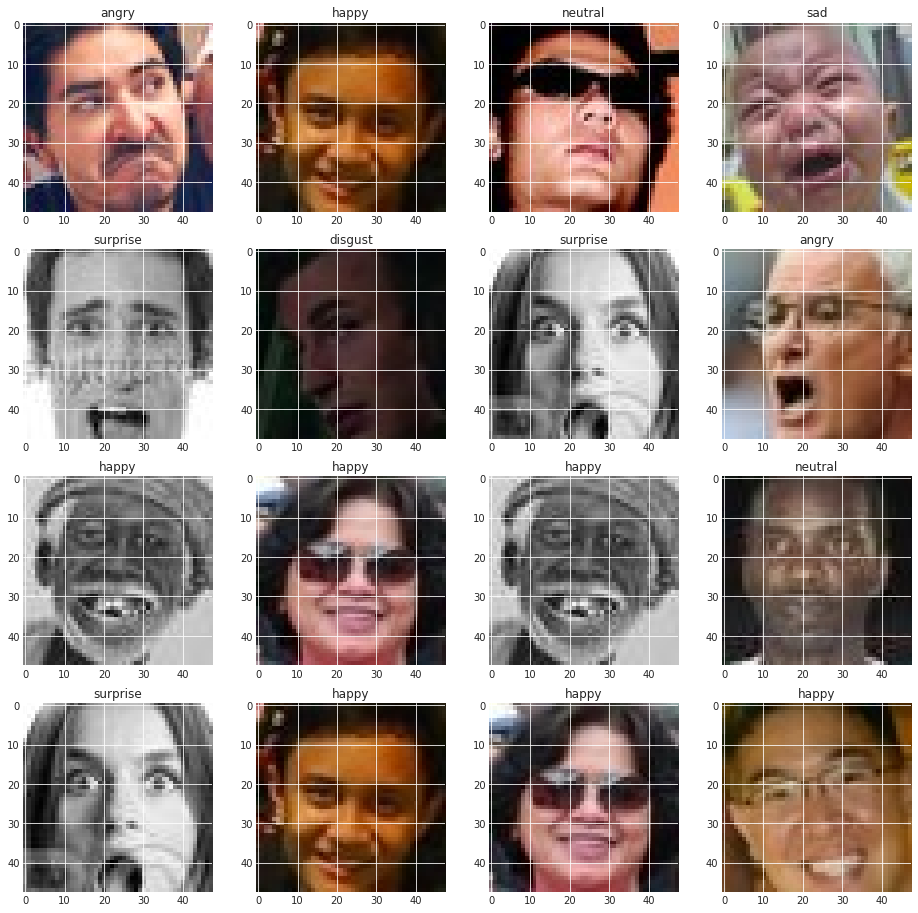

In [17]:
# define a function 
def show_examples(image,label,idx):
    # create 4x4 figure
    fig,axes=plt.subplots(nrows=4,ncols=4,figsize=(16,16))
    # loop through each figure
    for idx_f,ax in zip(idx,axes.ravel()):
        # add image to figure
        ax.imshow(image[idx_f].squeeze(),cmap="gray")
        # add title to each figure
        ax.set_title(label_to_text[label[idx_f]])
    plt.show()
idx=np.random.choice(16,16)
show_examples(image_array,Y_train,idx)

In [18]:
# now we will start with our model
# import all library required for model
from keras import layers,callbacks,utils,applications,optimizers
from keras.models import Sequential,Model,load_model
# run this block

In [19]:
model=Sequential()
# I will use MobileNetV2 as an pretrained model 
pretrained_model=tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=(48,48,3),include_top=False,
                                         weights="imagenet")
# you can use other pretrained model to increase accuracy or increase frame rate
# change all non-trainable layer to trainable
pretrained_model.trainable=True
# add pretrained_model to model
model.add(pretrained_model)
model.add(layers.GlobalAveragePooling2D())
# add dropout to increase accuracy by not overfitting
model.add(layers.Dropout(0.3))
# add dense layer as final output
model.add(layers.Dense(1))
model.summary()

2021-12-05 13:26:09.863835: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-05 13:26:09.962293: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-05 13:26:09.962980: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-05 13:26:09.964097: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

9420800/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 2, 2, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 2,225,153
Non-trainable params: 34,112
_________________________________________________________________


In [20]:
# you can add more layer to increase accuracy

In [21]:
from tensorflow.keras.optimizers import Adam

In [22]:
#compile model

model.compile(optimizer=Adam(0.0001),loss="mean_squared_error",metrics=["mae"])
# run
# starting learning rate is 1e-3
# you can change optimizer, loss function, metrics for better result

In [23]:
# create a model checkpoint to save model
ckp_path="trained_model/model"
model_checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath=ckp_path,
                                                   monitor="val_mae",
                                                   save_best_only=True,
                                                   save_weights_only=True,
                                                   mode="auto")
# this checkpoint save model when val_mae is lower then best val_mae
#run
                                                    

In [24]:
# now we will define learning rate reducer 
reduce_lr=tf.keras.callbacks.ReduceLROnPlateau(factor=0.9,
                                              monitor="val_mae",
                                              mode="auto",
                                              cooldown=0,
                                              patience=5,
                                              verbose=1,
                                              min_lr=1e-6)
# this will decrease learning rate when val_mae does't decrease durning last 5 epoch
# verbose is use to show val_mae every epoch


In [25]:
EPOCHS=150
BATCH_SIZE=64
# start training
history=model.fit(image_array,Y_train,
                 validation_data=(X_test,Y_test),
                 batch_size=BATCH_SIZE,
                 epochs=EPOCHS,
                 callbacks=[model_checkpoint,reduce_lr])
#run

2021-12-05 13:26:27.936299: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1766486016 exceeds 10% of free system memory.
2021-12-05 13:26:29.710411: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1766486016 exceeds 10% of free system memory.
2021-12-05 13:26:30.994822: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/150


2021-12-05 13:26:35.303338: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


999/999 [==============================] - 38s 28ms/step - loss: 3.9520 - mae: 1.5943 - val_loss: 30.9055 - val_mae: 5.1423
Epoch 2/150
999/999 [==============================] - 27s 27ms/step - loss: 2.7105 - mae: 1.3134 - val_loss: 5.5562 - val_mae: 1.9310
Epoch 3/150
999/999 [==============================] - 27s 27ms/step - loss: 2.3393 - mae: 1.2079 - val_loss: 3.6829 - val_mae: 1.5331
Epoch 4/150
999/999 [==============================] - 26s 26ms/step - loss: 2.1086 - mae: 1.1369 - val_loss: 2.8367 - val_mae: 1.3062
Epoch 5/150
999/999 [==============================] - 27s 27ms/step - loss: 1.8967 - mae: 1.0658 - val_loss: 2.6338 - val_mae: 1.2533
Epoch 6/150
999/999 [==============================] - 27s 27ms/step - loss: 1.7317 - mae: 1.0128 - val_loss: 2.7699 - val_mae: 1.2743
Epoch 7/150
999/999 [==============================] - 27s 27ms/step - loss: 1.5926 - mae: 0.9643 - val_loss: 2.3658 - val_mae: 1.1655
Epoch 8/150
999/999 [==============================] - 28s 28ms/st

In [26]:
# import matplotlib.pyplot as plt
# if the mae value is more near to zero then the model is more accurate

In [27]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae', 'lr'])

In [28]:
hist = history.history

In [29]:
hist['val_mae']
accuracy = [1-x for x in hist['loss']]

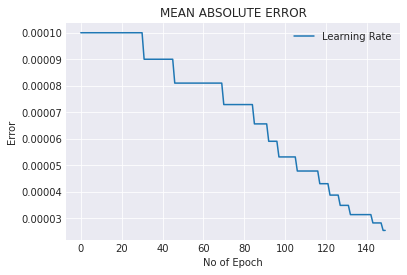

In [30]:

plt.title("MEAN ABSOLUTE ERROR")
plt.xlabel("No of Epoch")
plt.ylabel("Error")
plt.plot(history.history['lr'],label="Learning Rate")

plt.legend()
plt.show()


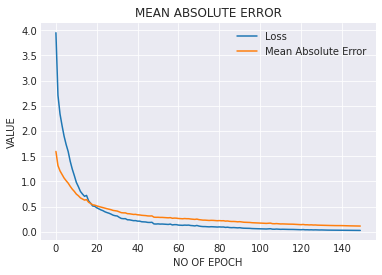

In [31]:
plt.xlabel("NO OF EPOCH")
plt.ylabel("VALUE")
plt.plot(history.history['loss'], label="Loss")
plt.title("MEAN ABSOLUTE ERROR")
plt.plot(history.history['mae'],label="Mean Absolute Error")
plt.legend()
plt.show()


In [32]:
 history.history

{'loss': [3.9519543647766113,
  2.710495948791504,
  2.339303493499756,
  2.1085944175720215,
  1.896748661994934,
  1.731725811958313,
  1.5925582647323608,
  1.3977750539779663,
  1.2434704303741455,
  1.1156960725784302,
  0.979604959487915,
  0.8937339782714844,
  0.7991237044334412,
  0.7478982210159302,
  0.702893853187561,
  0.7204948663711548,
  0.6126100420951843,
  0.5643271207809448,
  0.510644257068634,
  0.5040830969810486,
  0.4745742380619049,
  0.4537346661090851,
  0.43351611495018005,
  0.417739599943161,
  0.39512085914611816,
  0.37943556904792786,
  0.3665079176425934,
  0.3487478494644165,
  0.3279382586479187,
  0.31706175208091736,
  0.311604380607605,
  0.28516560792922974,
  0.26301753520965576,
  0.25789621472358704,
  0.2587810158729553,
  0.2364838421344757,
  0.23548325896263123,
  0.22621941566467285,
  0.21871212124824524,
  0.22003178298473358,
  0.20970337092876434,
  0.2092461884021759,
  0.1973555088043213,
  0.19582608342170715,
  0.1925043165683746

In [33]:
# after training is finished 
# load best model
model.load_weights(ckp_path)

In [34]:
# if you want to see result
prediction_val=model.predict(X_test,batch_size=BATCH_SIZE)


In [35]:
# remember X_test is use for validation and for testing 
# to get beffer result use different data for validation and testing

In [36]:
# prediction value 
prediction_val[:10]

array([[ 4.8738748e-02],
       [ 3.9499297e+00],
       [ 1.7974069e+00],
       [ 5.7742591e+00],
       [ 3.0792162e+00],
       [-4.4894218e-04],
       [ 4.1011219e+00],
       [ 5.3384113e+00],
       [ 3.0652461e+00],
       [ 4.6041803e+00]], dtype=float32)

In [37]:
# original value
Y_test[:10]

array([0, 4, 1, 4, 4, 0, 4, 6, 0, 3])

In [38]:
# now convert model to tensorflow lite model 
converter=tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=converter.convert()

#save model 
with open("model.tflite","wb") as f:
    f.write(tflite_model)

2021-12-05 14:43:58.106153: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
2021-12-05 14:44:15.022726: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-05 14:44:15.023257: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2021-12-05 14:44:15.023489: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2021-12-05 14:44:15.026874: I tensorflow/stream_executor/cuda/cuda_gpu_executor.

In [39]:
# save this version